# Dataset

[Medical Cost Personal](https://www.kaggle.com/datasets/mirichoi0218/insurance)

# ETL

**Carga y Exploración Inicial de Datos:**
* Cargar el dataset desde Kaggle.
* Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.
* Identificar y documentar los valores faltantes y outliers en el dataset.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

100%|██████████| 16.0k/16.0k [00:00<00:00, 29.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


In [ ]:
import pandas as pd
# Ruta de archivo CSV
data = pd.read_csv(path + "/insurance.csv")

In [ ]:
# Mostrar los primeros registros
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
# Mostrar DataFrame
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Mostrar los datos nulos y duplicados
print(f"Cantidad de datos ausentes: {data.isnull().sum().sum()}")
print(f"Cantidad de datos duplicados: {data.duplicated().sum()}")

Cantidad de datos ausentes: 0
Cantidad de datos duplicados: 1


In [ ]:
# Eliminar datos Duplicados
data = data.drop_duplicates()
print(f"Cantidad de datos duplicados: {data.duplicated().sum()}")

Cantidad de datos duplicados: 0


In [ ]:
# Mostrar metodo info y describe para comprender mejor el DF
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None
               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max     

In [ ]:
# Distribución de los datos únicos
data['children'].unique()

array([0, 1, 3, 2, 5, 4])

<Axes: >

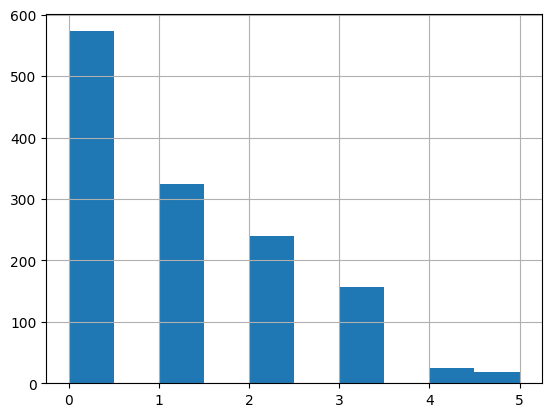

In [ ]:
# Histograma para visualizar datos
data['children'].hist()

In [ ]:
data['children'] = data['children'].astype('category')

<ipython-input-11-9e507c518f9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['children'] = data['children'].astype('category')


**Preprocesamiento de Datos:**
* Imputar valores faltantes utilizando técnicas adecuadas (media, mediana, moda, imputación avanzada).
* Codificar variables categóricas utilizando One-Hot Encoding.
* Escalar características numéricas utilizando StandardScaler.

# Transformación Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

# Definimos las columnas de cada tipo
num_features = ['age', 'bmi']
cat_features = ['sex', 'smoker', 'region']
ordinal_features = ['children']

# Configuración de transformación para las características ordinales
ordinal_transformer = OrdinalEncoder(categories=[[0, 1, 2, 3, 4, 5]])

# Configuración de transformación para las características categóricas
cat_transformer = OneHotEncoder(drop='first')  # Evita multicolinealidad eliminando la primera categoría

# Configuración de transformación para las características numéricas
num_transformer = StandardScaler()

# Crear el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features),
        ('ord', ordinal_transformer, ordinal_features)
    ]
)

# Crear el pipeline con el preprocesador
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Ajustar el pipeline al conjunto de datos (sin la columna objetivo)
X = data.drop('charges', axis=1)
y = data['charges']
pipeline.fit(X)

# Transformar los datos
X_preprocessed = pipeline.transform(X)

# Verificación de la forma del resultado transformado
print(X_preprocessed.shape)


(1337, 8)


In [ ]:
type(X_preprocessed)

numpy.ndarray

In [ ]:
# Obtener los nombres de las columnas de las características transformadas
encoded_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Convertir el resultado a un DataFrame de pandas
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=encoded_feature_names, index=X.index)

In [ ]:
# Mostrar datos transformados
X_preprocessed_df

,num__age,num__bmi,cat__sex_male,cat__smoker_yes,cat__region_northwest,cat__region_southeast,cat__region_southwest,ord__children
0,-1.440418,-0.453160,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.511647,0.509422,1.0,0.0,0.0,1.0,0.0,1.0
2,-0.799350,0.383155,1.0,0.0,0.0,1.0,0.0,3.0
3,-0.443201,-1.305052,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.514431,-0.292456,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,0.767704,0.050269,1.0,0.0,1.0,0.0,0.0,3.0
1334,-1.511647,0.206053,0.0,0.0,0.0,0.0,0.0,0.0
1335,-1.511647,1.014490,0.0,0.0,0.0,1.0,0.0,0.0
1336,-1.297958,-0.797524,0.0,0.0,0.0,0.0,1.0,0.0


# Variable de Interes y

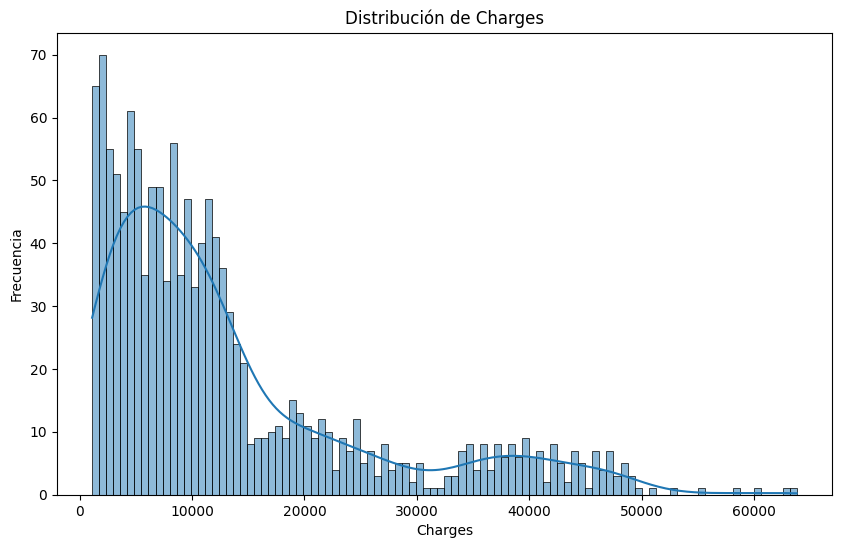

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64
Asimetría (skewness): 1.52
Curtosis: 1.60


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la distribución de la variable `charges`
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=100)
plt.title('Distribución de Charges')
plt.xlabel('Charges')
plt.ylabel('Frecuencia')
plt.show()

# Cálculo de estadísticas descriptivas
print(y.describe())

# Cálculo de la asimetría y la curtosis
skewness = y.skew()
kurtosis = y.kurt()

print(f"Asimetría (skewness): {skewness:.2f}")
print(f"Curtosis: {kurtosis:.2f}")

In [ ]:
# Cálculo de los percentiles
p33 = y.quantile(0.33)
p66 = y.quantile(0.66)

print(f"Percentil 33 (bajo-medio): {p33:.2f}")
print(f"Percentil 66 (medio-alto): {p66:.2f}")

# Cálculo del percentil 25, 50 (mediana) y 75
q1 = y.quantile(0.25)
q3 = y.quantile(0.75)
iqr = q3 - q1

# Límite superior para considerar valores "muy altos"
upper_bound = q3 + 1.5 * iqr

print(f"Percentil 25 (Q1): {q1:.2f}")
print(f"Percentil 75 (Q3): {q3:.2f}")
print(f"Rango intercuartílico (IQR): {iqr:.2f}")
print(f"Límite superior para 'muy alto': {upper_bound:.2f}")

Percentil 33 (bajo-medio): 6198.48
Percentil 66 (medio-alto): 12636.20
Percentil 25 (Q1): 4746.34
Percentil 75 (Q3): 16657.72
Rango intercuartílico (IQR): 11911.37
Límite superior para 'muy alto': 34524.78


charges
Bajo        441
Medio       441
Alto        316
Muy alto    139
Name: count, dtype: int64


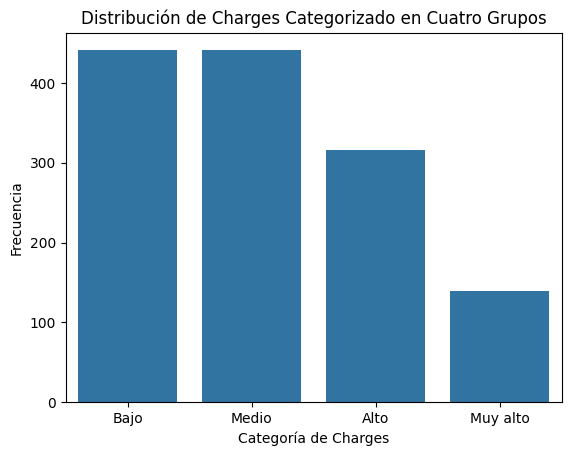

In [ ]:
# Crear una variable de respuesta categorizada en cuatro grupos usando el IQR
y_categorized = pd.cut(y, bins=[0, p33, p66, upper_bound, y.max()], labels=['Bajo', 'Medio', 'Alto', 'Muy alto'])

# Verificar la distribución de la nueva variable categorizada
print(y_categorized.value_counts())
sns.countplot(x=y_categorized)
plt.title('Distribución de Charges Categorizado en Cuatro Grupos')
plt.xlabel('Categoría de Charges')
plt.ylabel('Frecuencia')
plt.show()

Percentil 25 (Q1): 4746.34
Mediana (Q2): 9386.16
Percentil 75 (Q3): 16657.72
charges
Bajo          335
Medio-Bajo    334
Medio-Alto    334
Alto          334
Name: count, dtype: int64


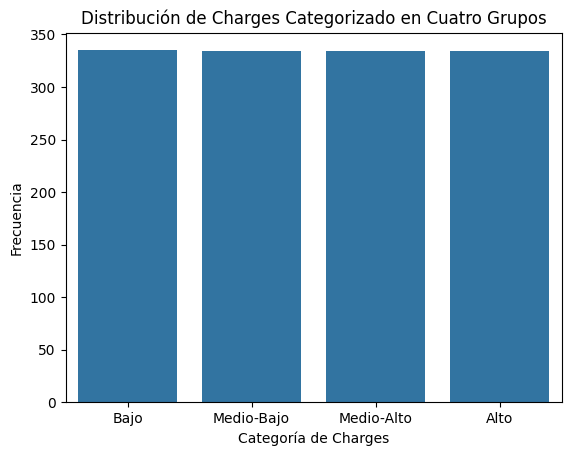

In [ ]:
# Cálculo de los cuartiles
q1 = y.quantile(0.25)
q2 = y.quantile(0.50)  # Mediana
q3 = y.quantile(0.75)

print(f"Percentil 25 (Q1): {q1:.2f}")
print(f"Mediana (Q2): {q2:.2f}")
print(f"Percentil 75 (Q3): {q3:.2f}")

# Crear una variable de respuesta categorizada en cuatro grupos usando los cuartiles
y_categorized = pd.cut(y, bins=[0, q1, q2, q3, y.max()], labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# Verificar la distribución de la nueva variable categorizada
print(y_categorized.value_counts())
sns.countplot(x=y_categorized)
plt.title('Distribución de Charges Categorizado en Cuatro Grupos')
plt.xlabel('Categoría de Charges')
plt.ylabel('Frecuencia')
plt.show()

# Modelos Pipeline

**Implementación de Modelos de Clasificación:**
* Entrenar y evaluar al menos tres modelos de clasificación diferentes:  Regresión Logística, K-Nearest Neighbors (KNN), y Árbol de Decisión.
* Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en conjuntos de entrenamiento y prueba usando y_categorized
X_train, X_test, y_train, y_test = train_test_split(X, y_categorized, test_size=0.3, random_state=42)

# Verificar la distribución de las clases en y_train e y_test
print("Distribución en y_train:")
print(y_train.value_counts())
print("\nDistribución en y_test:")
print(y_test.value_counts())

Distribución en y_train:
charges
Bajo          237
Medio-Bajo    235
Alto          235
Medio-Alto    228
Name: count, dtype: int64

Distribución en y_test:
charges
Medio-Alto    106
Medio-Bajo     99
Alto           99
Bajo           98
Name: count, dtype: int64


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# Definición de los modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    # Crear el pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Preprocesador definido previamente
        ('classifier', model)
    ])

    # Entrenar el modelo
    pipeline.fit(X_train, y_train)

    # Predicciones en el conjunto de prueba
    y_pred = pipeline.predict(X_test)

    # Definir etiquetas explícitamente
    labels = y_train.cat.categories

    # Evaluación del modelo
    print(f"\nModelo: {model_name}")
    print("Exactitud:", accuracy_score(y_test, y_pred))
    print("Reporte de clasificación:\n", classification_report(y_test, y_pred, labels=labels, target_names=labels))
    print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred, labels=labels))


Modelo: Logistic Regression
Exactitud: 0.8482587064676617
Reporte de clasificación:
               precision    recall  f1-score   support

        Bajo       0.89      0.93      0.91        98
  Medio-Bajo       0.78      0.88      0.82        99
  Medio-Alto       0.82      0.83      0.83       106
        Alto       0.93      0.76      0.83        99

    accuracy                           0.85       402
   macro avg       0.85      0.85      0.85       402
weighted avg       0.85      0.85      0.85       402

Matriz de confusión:
 [[91  7  0  0]
 [ 1 87 11  0]
 [ 3  9 88  6]
 [ 7  9  8 75]]

Modelo: K-Nearest Neighbors
Exactitud: 0.7587064676616916
Reporte de clasificación:
               precision    recall  f1-score   support

        Bajo       0.80      0.86      0.83        98
  Medio-Bajo       0.68      0.72      0.70        99
  Medio-Alto       0.72      0.78      0.75       106
        Alto       0.87      0.68      0.76        99

    accuracy                          

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Definir los modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Realizar validación cruzada y mostrar los resultados
for model_name, model in models.items():
    # Crear el pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Preprocesador definido previamente
        ('classifier', model)
    ])

    # Validación cruzada
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

    # Mostrar resultados
    print(f"\nModelo: {model_name}")
    print(f"Exactitud promedio de validación cruzada: {cv_scores.mean():.4f}")
    print(f"Desviación estándar de validación cruzada: {cv_scores.std():.4f}")
    print(f"Exactitud por partición: {cv_scores}")



Modelo: Logistic Regression
Exactitud promedio de validación cruzada: 0.8278
Desviación estándar de validación cruzada: 0.0254
Exactitud por partición: [0.83957219 0.81818182 0.80748663 0.87165775 0.80213904]

Modelo: K-Nearest Neighbors
Exactitud promedio de validación cruzada: 0.7369
Desviación estándar de validación cruzada: 0.0198
Exactitud por partición: [0.71657754 0.72727273 0.72192513 0.77005348 0.7486631 ]

Modelo: Decision Tree
Exactitud promedio de validación cruzada: 0.7968
Desviación estándar de validación cruzada: 0.0222
Exactitud por partición: [0.8342246  0.79144385 0.79679144 0.76470588 0.79679144]


# Optimización de Hiperparametros

**Optimización de Hiperparámetros:**
* Implementar GridSearchCV para optimizar los hiperparámetros de los modelos seleccionados.
* Implementar RandomizedSearchCV como método alternativo de optimización.
* Comparar los resultados de GridSearchCV y RandomizedSearchCV para los modelos optimizados.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definición de los hiperparámetros para cada modelo
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l1','l2'],
        'classifier__solver': ['liblinear']  # Permite l1 y l2
    },
    'K-Nearest Neighbors': {
        'classifier__n_neighbors': [3, 5, 7, 9, 11],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__criterion': ['gini', 'entropy']
    }
}

# Resultados de búsqueda de hiperparámetros
best_params = {}

# Optimización para cada modelo
for model_name, param_grid in param_grids.items():
    # Crear el pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Preprocesador definido previamente
        ('classifier', models[model_name])  # Modelo a optimizar
    ])

    # Configuración de GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Ejecutar búsqueda de hiperparámetros
    grid_search.fit(X_train, y_train)

    # Guardar y mostrar los mejores resultados
    best_params[model_name] = grid_search.best_params_
    print(f"\nModelo: {model_name}")
    print(f"Mejores hiperparámetros: {grid_search.best_params_}")
    print(f"Mejor exactitud promedio: {grid_search.best_score_:.4f}")



Modelo: Logistic Regression
Mejores hiperparámetros: {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Mejor exactitud promedio: 0.7936


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Modelo: K-Nearest Neighbors
Mejores hiperparámetros: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__weights': 'distance'}
Mejor exactitud promedio: 0.8011

Modelo: Decision Tree
Mejores hiperparámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Mejor exactitud promedio: 0.8310


**Evaluación de Modelos:**
* Evaluar los modelos optimizados utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.
* Generar y analizar la matriz de confusión para los modelos optimizados.
* Crear y visualizar la curva ROC para evaluar la capacidad del modelo para distinguir entre clases.


--- Evaluación del Modelo: Logistic Regression ---
Reporte de Clasificación:
               precision    recall  f1-score   support

        Bajo       0.94      0.76      0.84        99
  Medio-Bajo       0.83      0.95      0.89        98
  Medio-Alto       0.72      0.78      0.75       106
        Alto       0.73      0.70      0.72        99

    accuracy                           0.80       402
   macro avg       0.80      0.80      0.80       402
weighted avg       0.80      0.80      0.80       402

[[93  5  0  0]
 [ 7 69 23  0]
 [ 3 15 83  5]
 [ 9  5 10 75]]


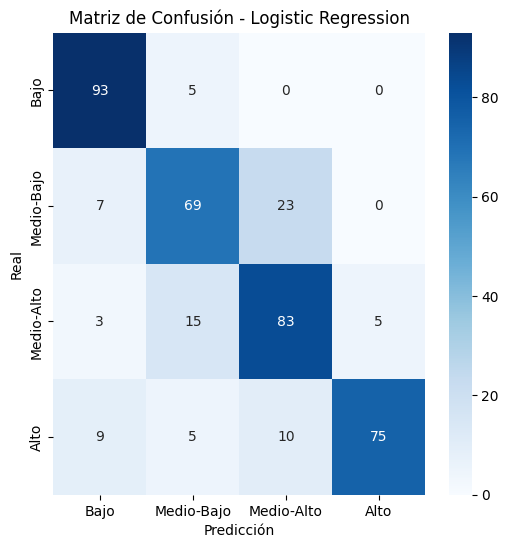

ROC-AUC Promedio (Macro) para Logistic Regression: 0.4172


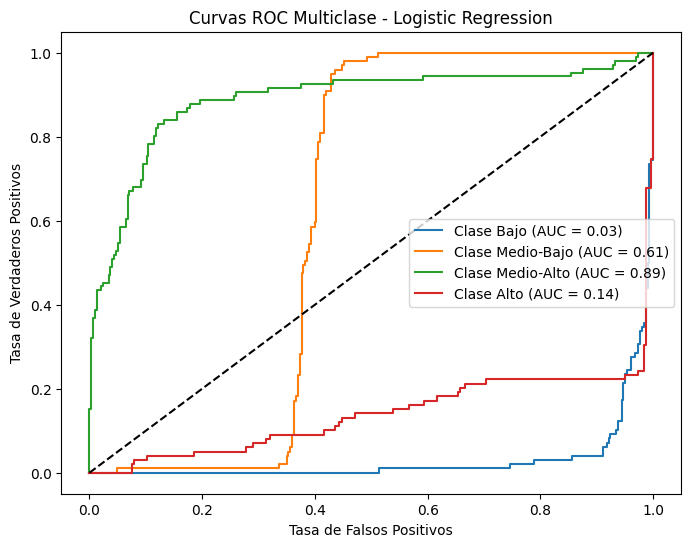


--- Evaluación del Modelo: K-Nearest Neighbors ---
Reporte de Clasificación:
               precision    recall  f1-score   support

        Bajo       0.87      0.68      0.76        99
  Medio-Bajo       0.83      0.87      0.85        98
  Medio-Alto       0.81      0.85      0.83       106
        Alto       0.73      0.82      0.77        99

    accuracy                           0.80       402
   macro avg       0.81      0.80      0.80       402
weighted avg       0.81      0.80      0.80       402

[[85  9  0  4]
 [ 7 81  9  2]
 [ 3  9 90  4]
 [ 8 12 12 67]]


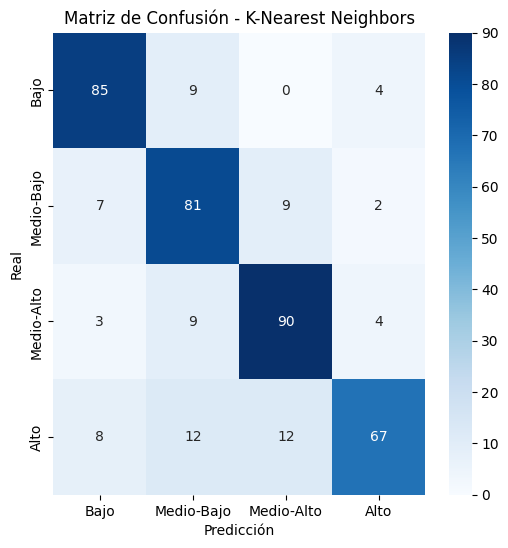


--- Evaluación del Modelo: Decision Tree ---
Reporte de Clasificación:
               precision    recall  f1-score   support

        Bajo       0.76      0.78      0.77        99
  Medio-Bajo       0.85      0.90      0.88        98
  Medio-Alto       0.89      0.80      0.84       106
        Alto       0.86      0.89      0.88        99

    accuracy                           0.84       402
   macro avg       0.84      0.84      0.84       402
weighted avg       0.84      0.84      0.84       402

[[88  2  0  8]
 [ 5 88  2  4]
 [ 2  7 85 12]
 [ 8  5  9 77]]


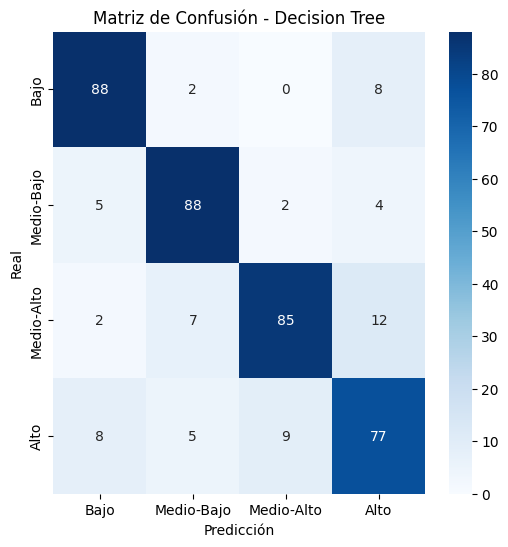

ROC-AUC Promedio (Macro) para Decision Tree: 0.4783


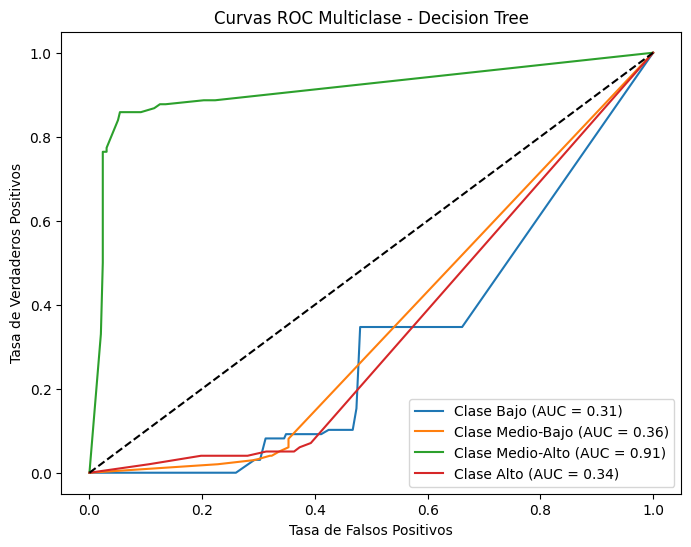

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Binarización de las etiquetas para calcular el ROC-AUC multiclase
y_test_binarized = label_binarize(y_test, classes=y_train.cat.categories)

# Resultados de los modelos optimizados
for model_name, model in models.items():
    print(f"\n--- Evaluación del Modelo: {model_name} ---")

    # Quitar el prefijo 'classifier__' de los mejores hiperparámetros
    best_model_params = {k.replace('classifier__', ''): v for k, v in best_params[model_name].items()}

    # Crear el pipeline con los mejores hiperparámetros de cada modelo
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model.__class__(**best_model_params))  # Aplicar los mejores hiperparámetros sin prefijo
    ])

    # Entrenar el modelo con el conjunto de entrenamiento completo
    pipeline.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = pipeline.predict(X_test)

    # Reporte de clasificación
    print("Reporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=y_train.cat.categories))

    # Matriz de Confusión
    conf_matrix = confusion_matrix(y_test, y_pred, labels=y_train.cat.categories)
    print(conf_matrix)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y_train.cat.categories, yticklabels=y_train.cat.categories)
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

    # Calcular el ROC-AUC para cada clase en el enfoque "one-vs-rest"
    if model_name == 'Logistic Regression' or model_name == 'Decision Tree':
        y_pred_proba = pipeline.predict_proba(X_test)

        # Calcular el AUC para cada clase
        roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, average="macro", multi_class="ovr")
        print(f"ROC-AUC Promedio (Macro) para {model_name}: {roc_auc:.4f}")

        # Graficar las curvas ROC para cada clase
        plt.figure(figsize=(8, 6))
        for i, class_name in enumerate(y_train.cat.categories):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
            plt.plot(fpr, tpr, label=f'Clase {class_name} (AUC = {roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i]):.2f})')

        plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
        plt.title(f'Curvas ROC Multiclase - {model_name}')
        plt.xlabel('Tasa de Falsos Positivos')
        plt.ylabel('Tasa de Verdaderos Positivos')
        plt.legend(loc='best')
        plt.show()



--- Evaluación del Modelo: Logistic Regression ---
Reporte de Clasificación:
               precision    recall  f1-score   support

        Bajo       0.83      0.95      0.89        98
  Medio-Bajo       0.73      0.70      0.72        99
  Medio-Alto       0.72      0.78      0.75       106
        Alto       0.94      0.76      0.84        99

    accuracy                           0.80       402
   macro avg       0.80      0.80      0.80       402
weighted avg       0.80      0.80      0.80       402



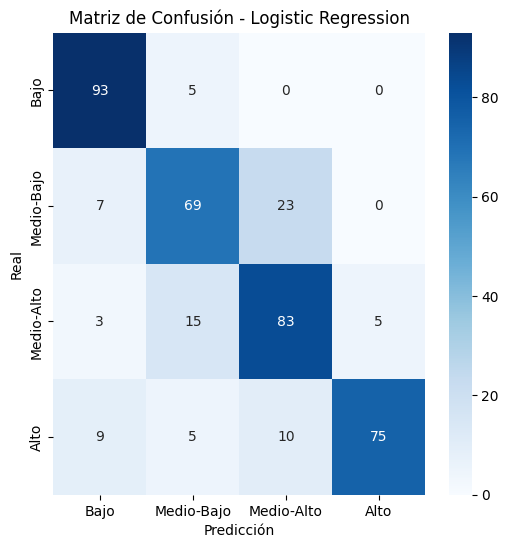

ROC-AUC Promedio (Macro) para Logistic Regression: 0.4172


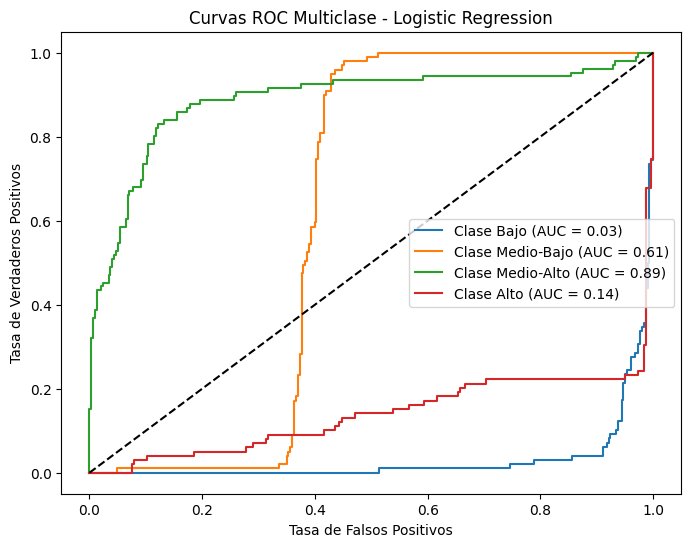


--- Evaluación del Modelo: K-Nearest Neighbors ---
Reporte de Clasificación:
               precision    recall  f1-score   support

        Bajo       0.83      0.87      0.85        98
  Medio-Bajo       0.73      0.82      0.77        99
  Medio-Alto       0.81      0.85      0.83       106
        Alto       0.87      0.68      0.76        99

    accuracy                           0.80       402
   macro avg       0.81      0.80      0.80       402
weighted avg       0.81      0.80      0.80       402



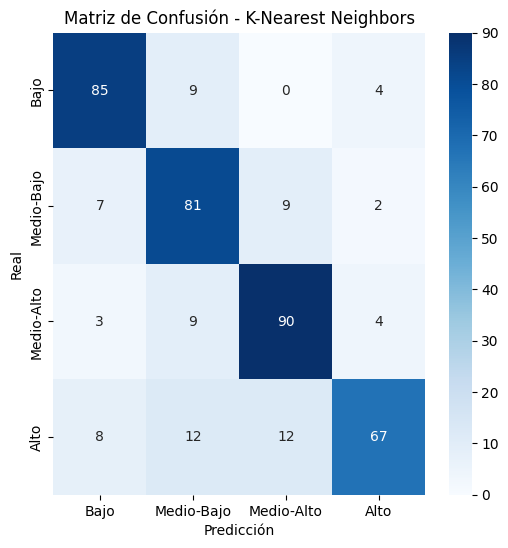


--- Evaluación del Modelo: Decision Tree ---
Reporte de Clasificación:
               precision    recall  f1-score   support

        Bajo       0.85      0.90      0.88        98
  Medio-Bajo       0.86      0.89      0.88        99
  Medio-Alto       0.89      0.80      0.84       106
        Alto       0.76      0.78      0.77        99

    accuracy                           0.84       402
   macro avg       0.84      0.84      0.84       402
weighted avg       0.84      0.84      0.84       402



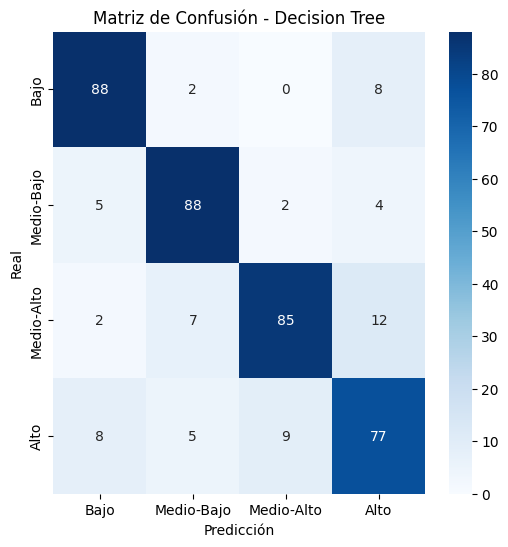

ROC-AUC Promedio (Macro) para Decision Tree: 0.4783


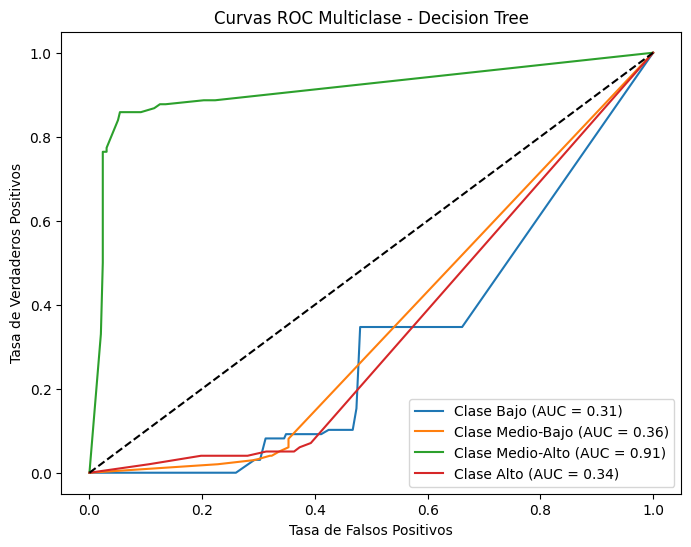

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Binarización de las etiquetas para calcular el ROC-AUC multiclase
y_test_binarized = label_binarize(y_test, classes=y_train.cat.categories)

# Resultados de los modelos optimizados
for model_name, model in models.items():
    print(f"\n--- Evaluación del Modelo: {model_name} ---")

    # Quitar el prefijo 'classifier__' de los mejores hiperparámetros
    best_model_params = {k.replace('classifier__', ''): v for k, v in best_params[model_name].items()}

    # Crear el pipeline con los mejores hiperparámetros de cada modelo
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model.__class__(**best_model_params))  # Aplicar los mejores hiperparámetros sin prefijo
    ])

    # Entrenar el modelo con el conjunto de entrenamiento completo
    pipeline.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = pipeline.predict(X_test)

    # Reporte de clasificación
    print("Reporte de Clasificación:\n", classification_report(y_test, y_pred, labels=y_train.cat.categories, target_names=y_train.cat.categories))

    # Matriz de Confusión
    conf_matrix = confusion_matrix(y_test, y_pred, labels=y_train.cat.categories)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y_train.cat.categories, yticklabels=y_train.cat.categories)
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

    # Calcular el ROC-AUC para cada clase en el enfoque "one-vs-rest"
    if model_name == 'Logistic Regression' or model_name == 'Decision Tree':
        y_pred_proba = pipeline.predict_proba(X_test)

        # Calcular el AUC para cada clase
        roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, average="macro", multi_class="ovr")
        print(f"ROC-AUC Promedio (Macro) para {model_name}: {roc_auc:.4f}")

        # Graficar las curvas ROC para cada clase
        plt.figure(figsize=(8, 6))
        for i, class_name in enumerate(y_train.cat.categories):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
            plt.plot(fpr, tpr, label=f'Clase {class_name} (AUC = {roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i]):.2f})')

        plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
        plt.title(f'Curvas ROC Multiclase - {model_name}')
        plt.xlabel('Tasa de Falsos Positivos')
        plt.ylabel('Tasa de Verdaderos Positivos')
        plt.legend(loc='best')
        plt.show()



--- Evaluación del Modelo: Logistic Regression ---
Reporte de Clasificación:
               precision    recall  f1-score   support

        Bajo       0.83      0.95      0.89        98
  Medio-Bajo       0.73      0.70      0.72        99
  Medio-Alto       0.72      0.78      0.75       106
        Alto       0.94      0.76      0.84        99

    accuracy                           0.80       402
   macro avg       0.80      0.80      0.80       402
weighted avg       0.80      0.80      0.80       402



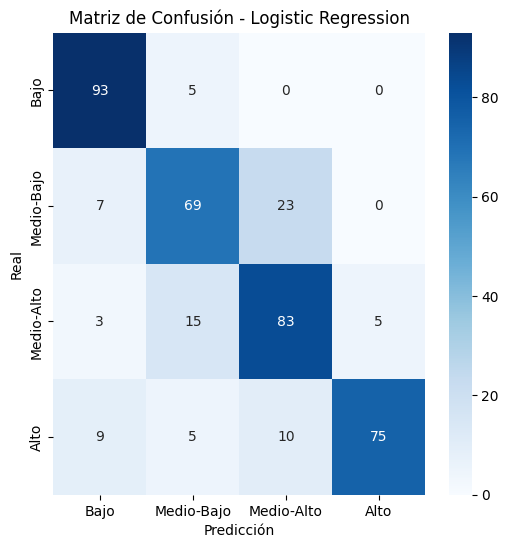

ROC-AUC Promedio (Macro) para Logistic Regression: 0.4172


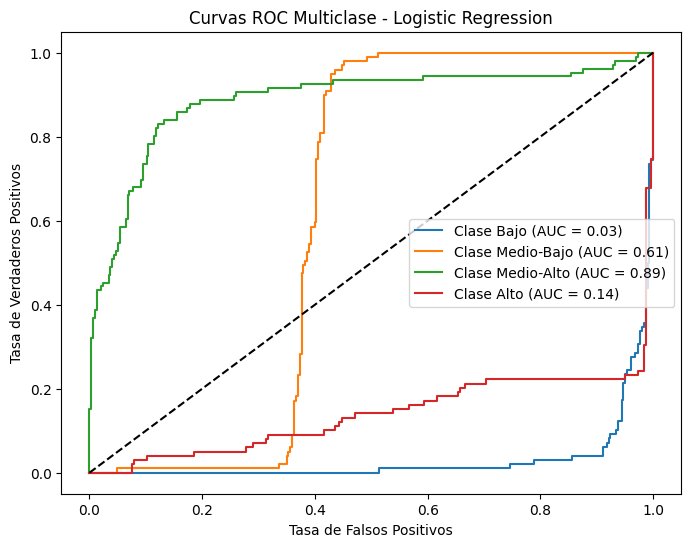


--- Evaluación del Modelo: K-Nearest Neighbors ---
Reporte de Clasificación:
               precision    recall  f1-score   support

        Bajo       0.83      0.87      0.85        98
  Medio-Bajo       0.73      0.82      0.77        99
  Medio-Alto       0.81      0.85      0.83       106
        Alto       0.87      0.68      0.76        99

    accuracy                           0.80       402
   macro avg       0.81      0.80      0.80       402
weighted avg       0.81      0.80      0.80       402



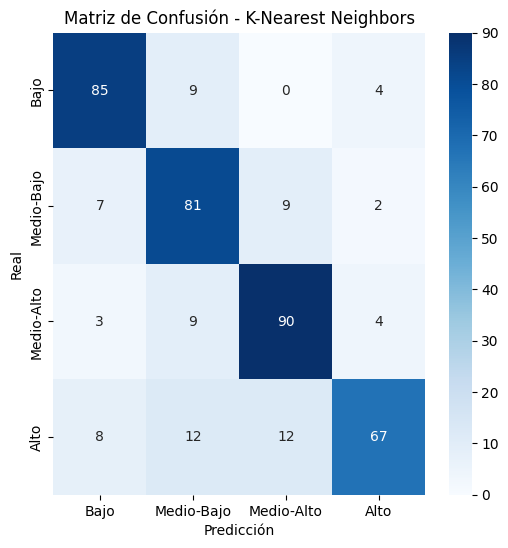

ROC-AUC Promedio (Macro) para K-Nearest Neighbors: 0.5183


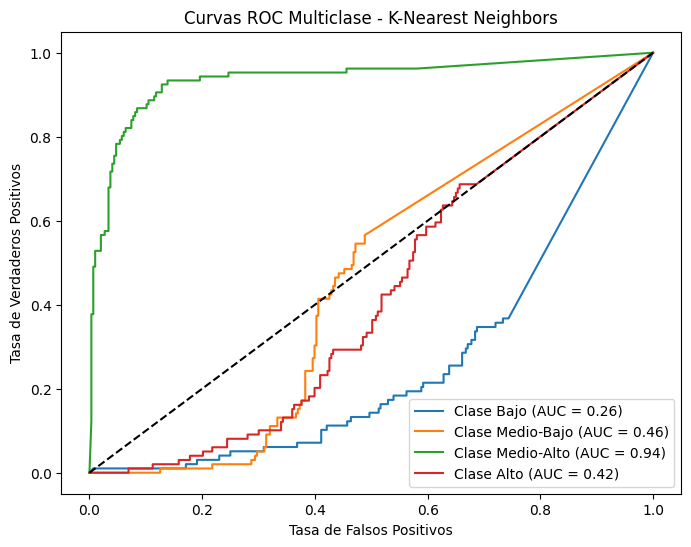


--- Evaluación del Modelo: Decision Tree ---
Reporte de Clasificación:
               precision    recall  f1-score   support

        Bajo       0.85      0.90      0.88        98
  Medio-Bajo       0.86      0.89      0.88        99
  Medio-Alto       0.89      0.80      0.84       106
        Alto       0.76      0.78      0.77        99

    accuracy                           0.84       402
   macro avg       0.84      0.84      0.84       402
weighted avg       0.84      0.84      0.84       402



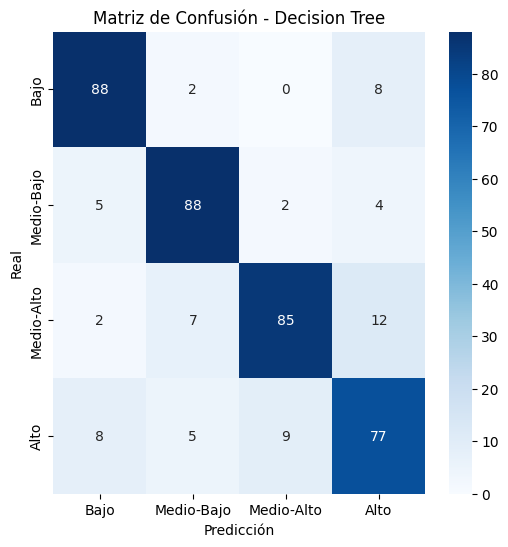

ROC-AUC Promedio (Macro) para Decision Tree: 0.4783


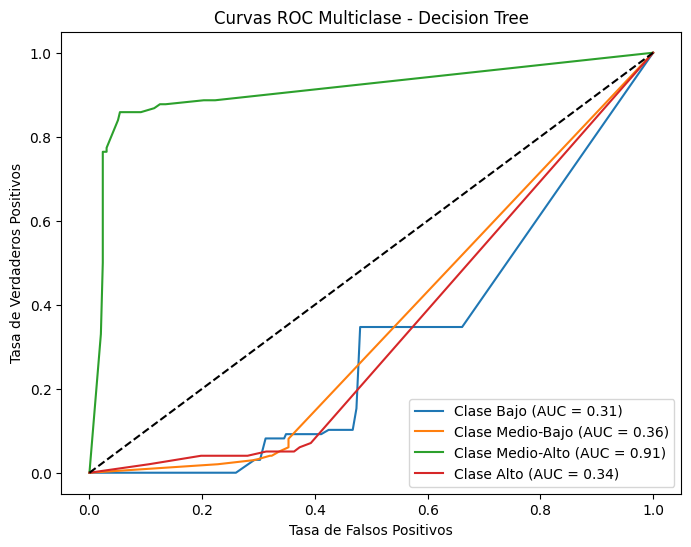

In [ ]:
# Evaluación y curvas ROC-AUC solo si el modelo tiene predict_proba()
for model_name, model in models.items():
    print(f"\n--- Evaluación del Modelo: {model_name} ---")

    # Quitar el prefijo 'classifier__' de los mejores hiperparámetros
    best_model_params = {k.replace('classifier__', ''): v for k, v in best_params[model_name].items()}

    # Crear el pipeline con los mejores hiperparámetros de cada modelo
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model.__class__(**best_model_params))  # Aplicar los mejores hiperparámetros sin prefijo
    ])

    # Entrenar el modelo con el conjunto de entrenamiento completo
    pipeline.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = pipeline.predict(X_test)

    # Reporte de clasificación
    print("Reporte de Clasificación:\n", classification_report(y_test, y_pred, labels=y_train.cat.categories, target_names=y_train.cat.categories))

    # Matriz de Confusión
    conf_matrix = confusion_matrix(y_test, y_pred, labels=y_train.cat.categories)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y_train.cat.categories, yticklabels=y_train.cat.categories)
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

    # Calcular el ROC-AUC solo si predict_proba() está disponible
    if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
        y_pred_proba = pipeline.predict_proba(X_test)

        # Calcular el AUC para cada clase
        roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, average="macro", multi_class="ovr")
        print(f"ROC-AUC Promedio (Macro) para {model_name}: {roc_auc:.4f}")

        # Graficar las curvas ROC para cada clase
        plt.figure(figsize=(8, 6))
        for i, class_name in enumerate(y_train.cat.categories):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
            plt.plot(fpr, tpr, label=f'Clase {class_name} (AUC = {roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i]):.2f})')

        plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
        plt.title(f'Curvas ROC Multiclase - {model_name}')
        plt.xlabel('Tasa de Falsos Positivos')
        plt.ylabel('Tasa de Verdaderos Positivos')
        plt.legend(loc='best')
        plt.show()
    else:
        print(f"El modelo {model_name} no tiene el método predict_proba(), por lo que no se puede calcular el ROC-AUC.")
